<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_First_Assignment/blob/main/Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [2]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create a DataFrame for analysis
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Dimensions of the dataset
print(f"Dataset shape: {df.shape}")
print(f"Rows (samples/patients): {df.shape[0]}")
print(f"Columns (features + target): {df.shape[1]}")
print(f"Number of features: {len(data.feature_names)}")
print(f"Target classes: {data.target_names}")

Dataset shape: (569, 31)
Rows (samples/patients): 569
Columns (features + target): 31
Number of features: 30
Target classes: ['malignant' 'benign']


## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

Task: Binary classification to predict if a breast tumor is malignant (0) or benign (1) using 30 numerical features.
Goal: Build a classification model to assist in medical diagnosis.



## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [3]:
print("\nFirst 10 rows of data:")
print(df.head(10))
print("\nData types:")
print(df.dtypes)
print("\nTarget distribution:")
print(df['target'].value_counts())
print(f"0 = {data.target_names[0]}, 1 = {data.target_names[1]}")


First 10 rows of data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710        

In [4]:
# Statistical summary of all attributes
print("\nStatistical summary of all attributes:")
pd.set_option('display.precision', 3)
print(df.describe())


Statistical summary of all attributes:
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count      569.000       569.000         569.000    569.000          569.000   
mean        14.127        19.290          91.969    654.889            0.096   
std          3.524         4.301          24.299    351.914            0.014   
min          6.981         9.710          43.790    143.500            0.053   
25%         11.700        16.170          75.170    420.300            0.086   
50%         13.370        18.840          86.240    551.100            0.096   
75%         15.780        21.800         104.100    782.700            0.105   
max         28.110        39.280         188.500   2501.000            0.163   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count           569.000         569.000              569.000        569.000   
mean              0.104           0.089                0.049          0.181   
st

I can see the range, central tendency, and spread of each feature. For example, mean radius ranges from ~6.9 to ~28.1 units. All features are on different scales, suggesting normalization may be needed for some algorithms.

In [5]:
# Class distribution
print("\nClass distribution:")
class_counts = df['target'].value_counts()
print(class_counts)
print(f"\nMalignant (0): {class_counts[0]} instances")
print(f"Benign (1): {class_counts[1]} instances")


Class distribution:
target
1    357
0    212
Name: count, dtype: int64

Malignant (0): 212 instances
Benign (1): 357 instances


The dataset is moderately imbalanced (212 vs 357). This could affect model training if not addressed, but the imbalance is not extreme.

In [6]:
# Skew of univariate distributions
print("\nSkew of univariate distributions:")
print(df.drop('target', axis=1).skew())


Skew of univariate distributions:
mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fr

Most features show positive skew (tail to the right). High skewness values suggest some features may benefit from transformation to improve normality.

In [7]:
# Correlation between attributes
print("\nCorrelation matrix (first 5 features):")
print(df.drop('target', axis=1).iloc[:, :5].corr())


Correlation matrix (first 5 features):
                 mean radius  mean texture  mean perimeter  mean area  \
mean radius            1.000         0.324           0.998      0.987   
mean texture           0.324         1.000           0.330      0.321   
mean perimeter         0.998         0.330           1.000      0.987   
mean area              0.987         0.321           0.987      1.000   
mean smoothness        0.171        -0.023           0.207      0.177   

                 mean smoothness  
mean radius                0.171  
mean texture              -0.023  
mean perimeter             0.207  
mean area                  0.177  
mean smoothness            1.000  


Many features are highly correlated (e.g., mean radius and mean perimeter ~0.998). This indicates potential multicollinearity; I might consider dimensionality reduction or feature selection.


Generated univariate plots
Histograms: Showing the distribution of each feature individually.


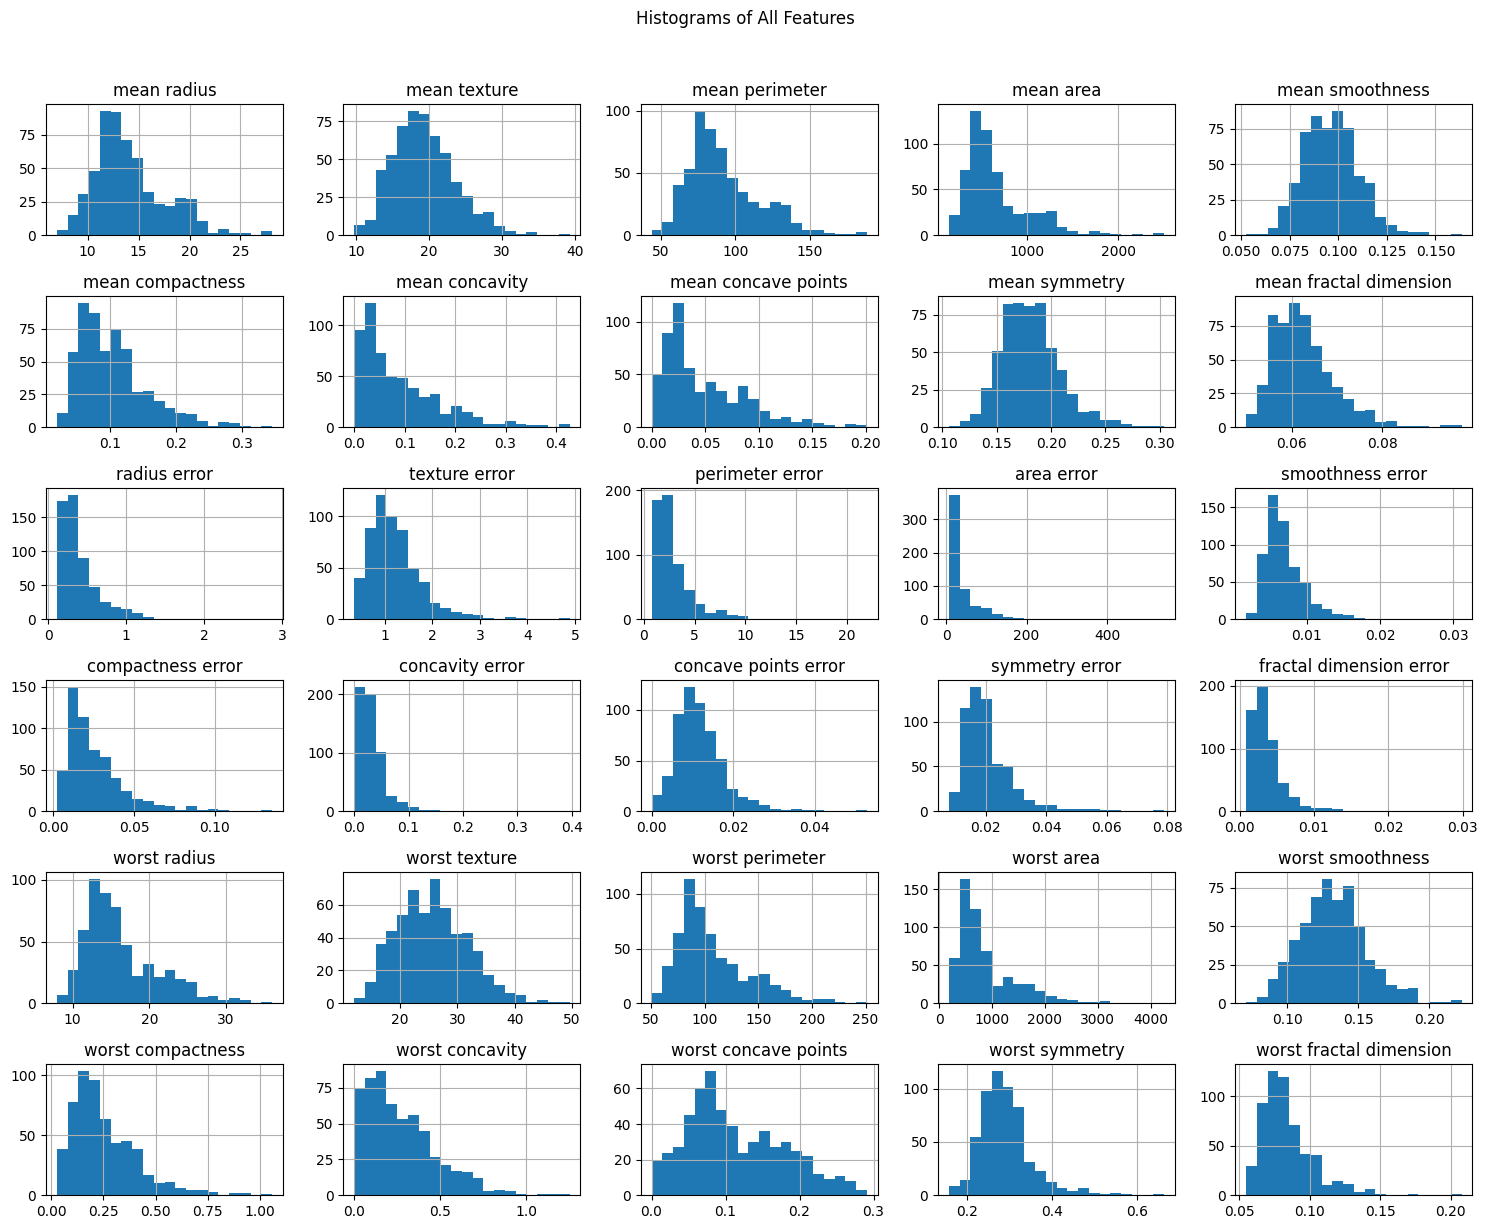

In [8]:
# Univariate plots: Histograms
print("\nGenerated univariate plots")
print("Histograms: Showing the distribution of each feature individually.")
df.drop('target', axis=1).hist(figsize=(15, 12), bins=20)
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout()
plt.show()

Most features appear roughly normally distributed but with some right skew. Different features have different value ranges.


Density plots: Smoothed version of histograms showing probability density.


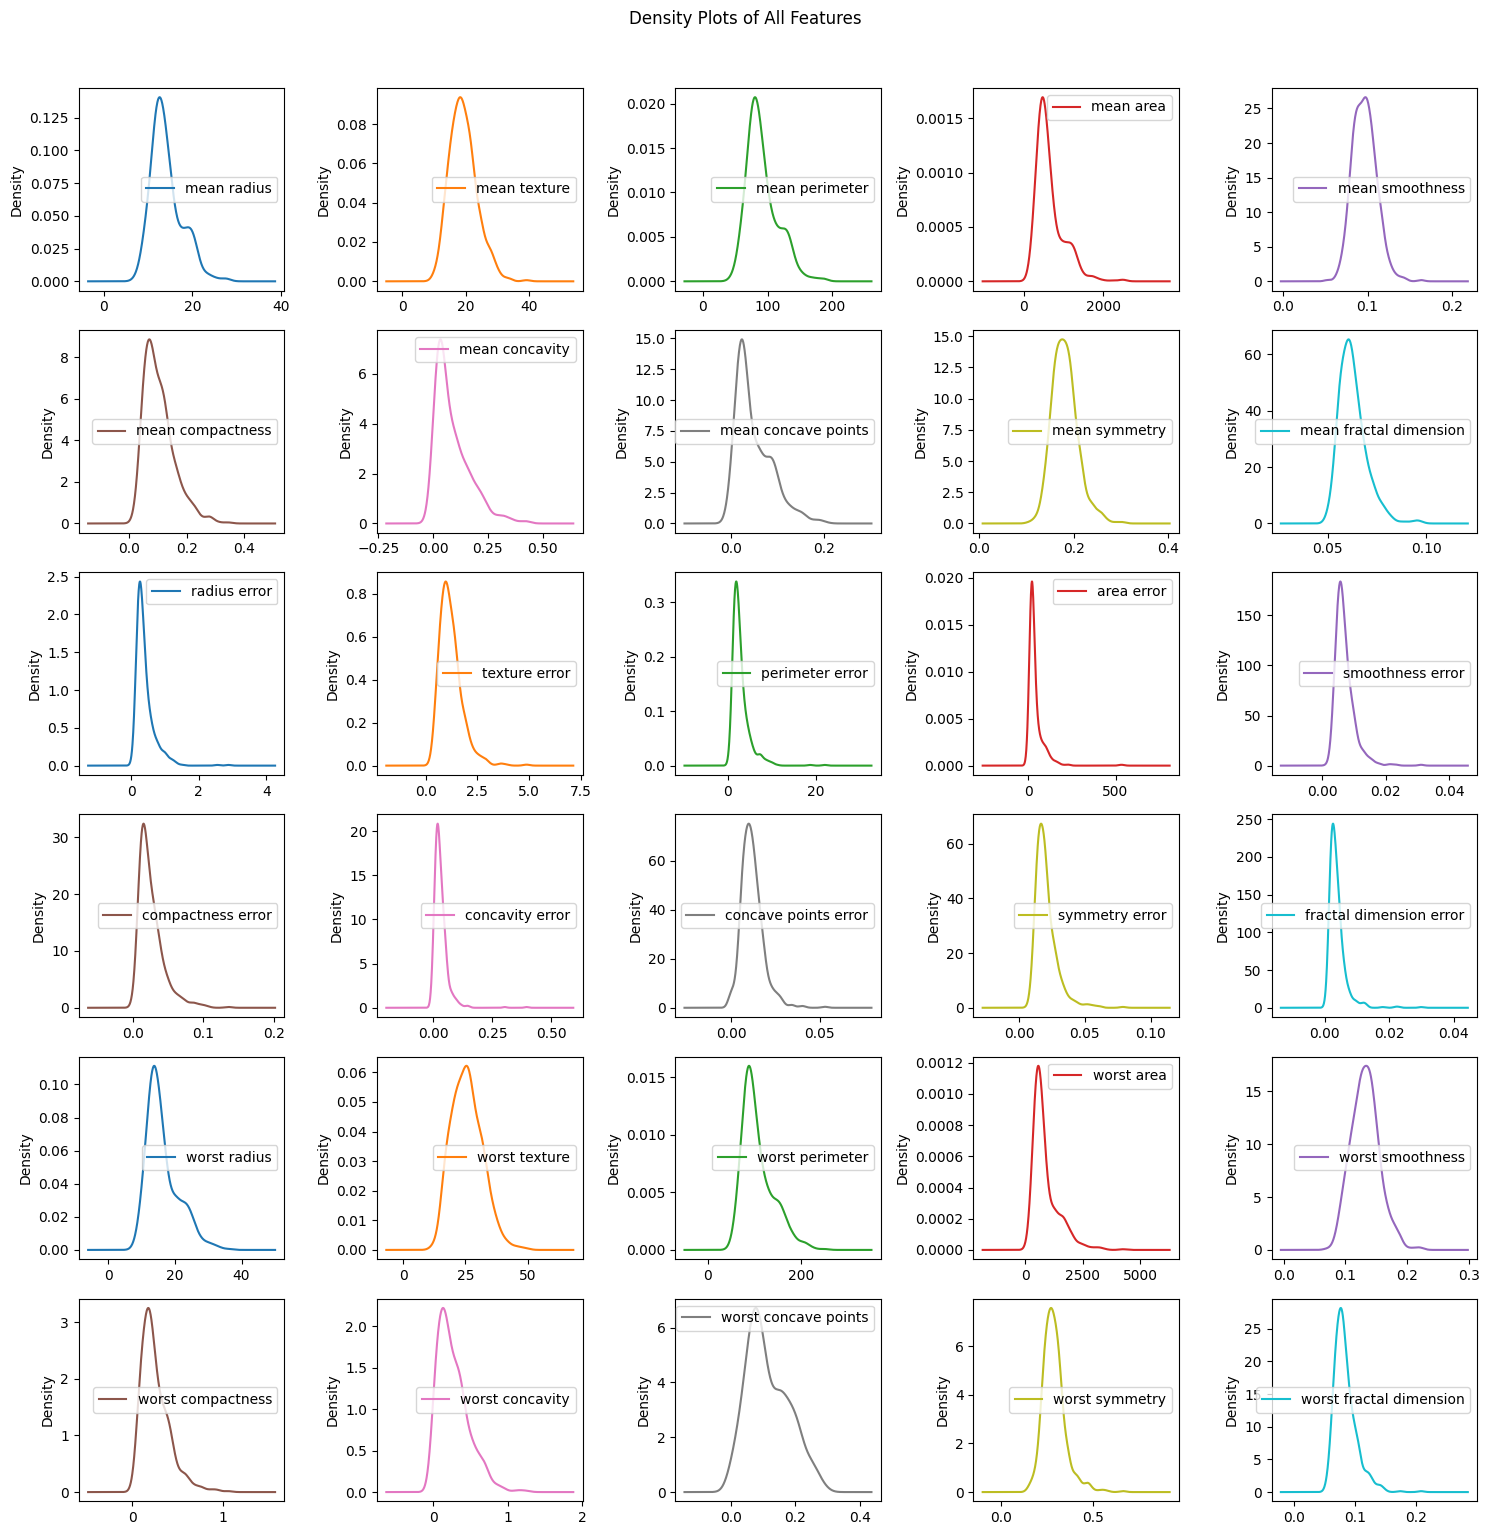

In [9]:
# Univariate plots: Density plots
print("\nDensity plots: Smoothed version of histograms showing probability density.")
df.drop('target', axis=1).plot(kind='density', subplots=True, layout=(6, 5),
                                sharex=False, figsize=(15, 15))
plt.suptitle('Density Plots of All Features', y=1.02)
plt.tight_layout()
plt.show()

Confirms the right skew observed in histograms. Shows clear peaks in distributions for most features.


Box plots: Showing median, quartiles, and potential outliers.


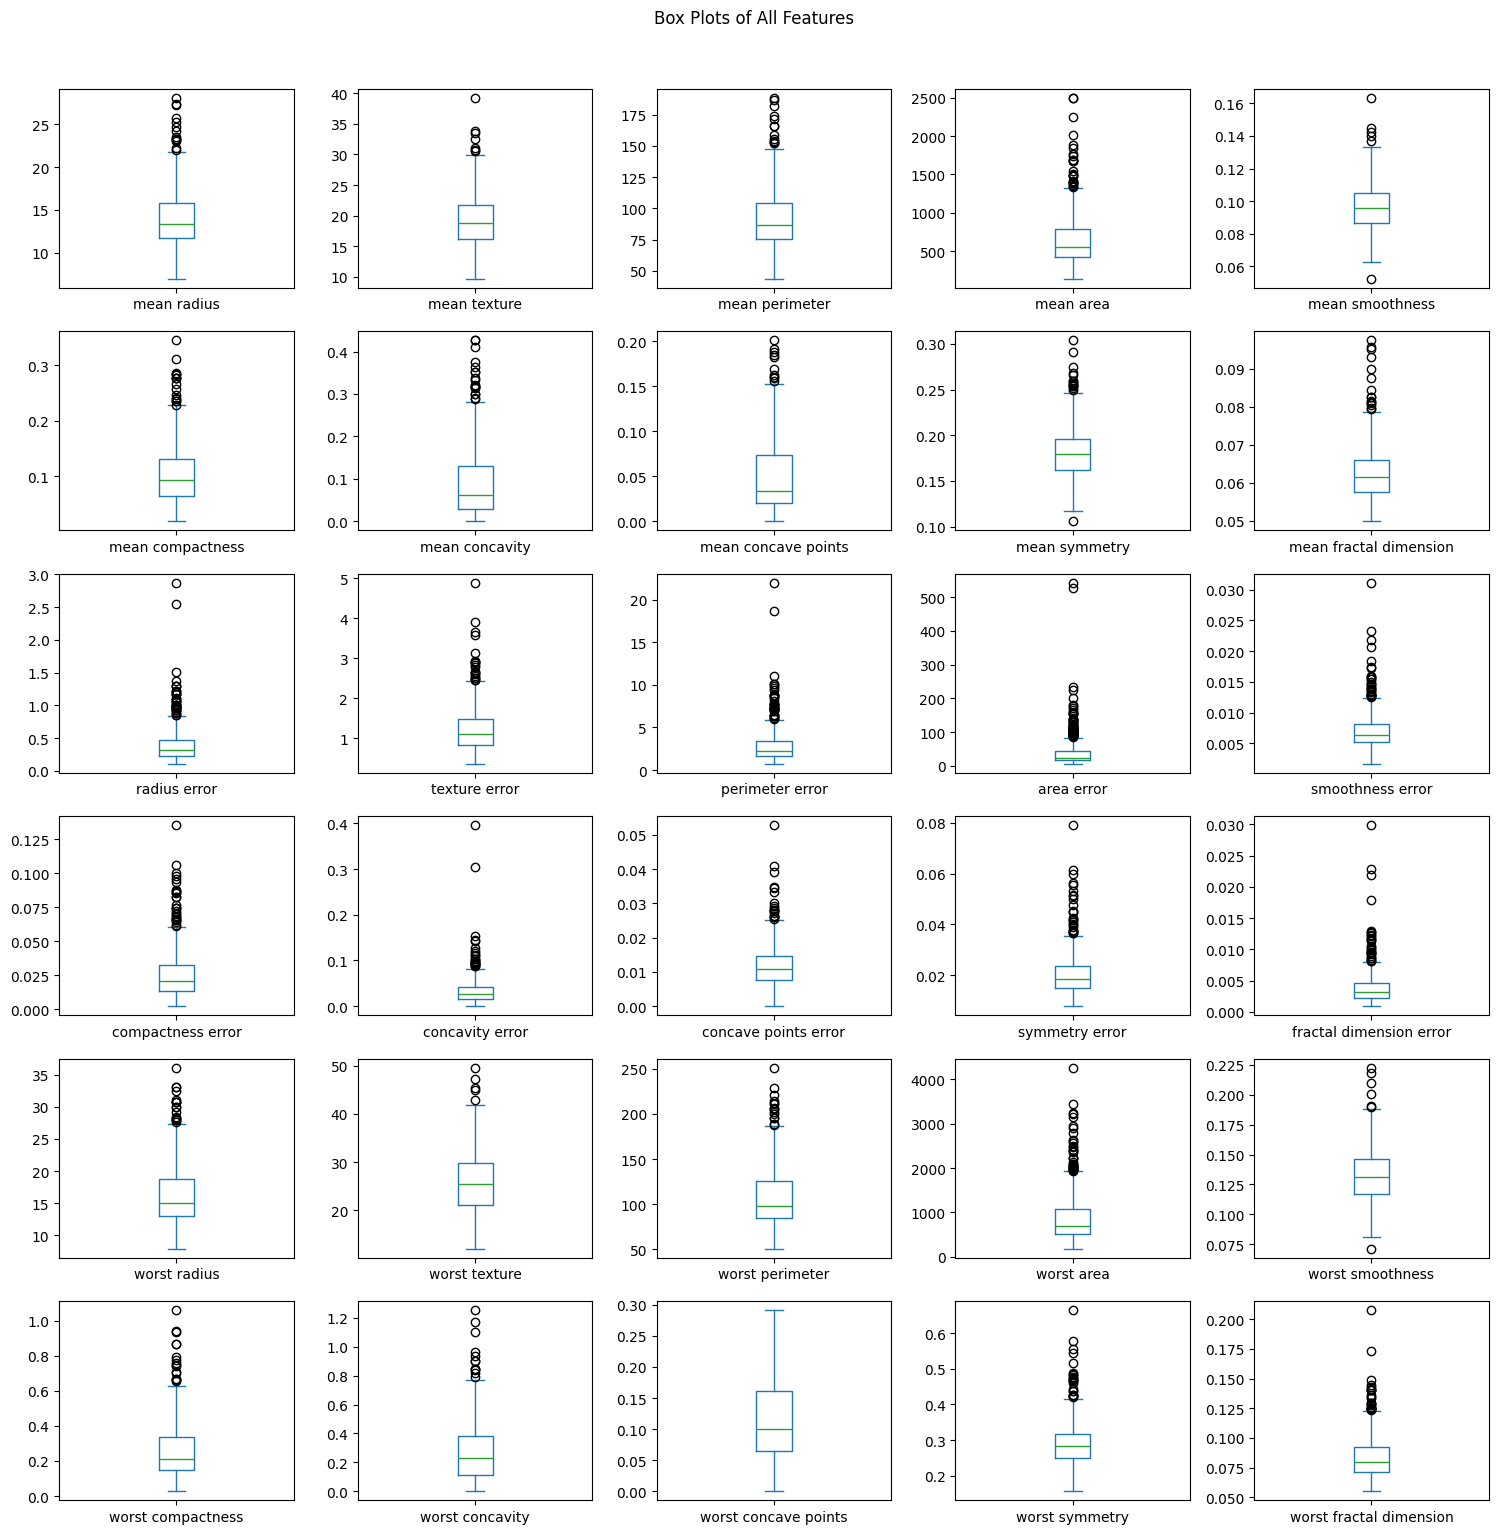

In [10]:
# Univariate plots: Box plots
print("\nBox plots: Showing median, quartiles, and potential outliers.")
df.drop('target', axis=1).plot(kind='box', subplots=True, layout=(6, 5),
                               sharex=False, sharey=False, figsize=(15, 15))
plt.suptitle('Box Plots of All Features', y=1.02)
plt.tight_layout()
plt.show()

Many features show outliers (dots beyond whiskers). Features like 'area error' and 'worst concavity' have particularly spread-out distributions.

Correlation heatmap: Visualizing relationships between all feature pairs.
Generated multivariate plots


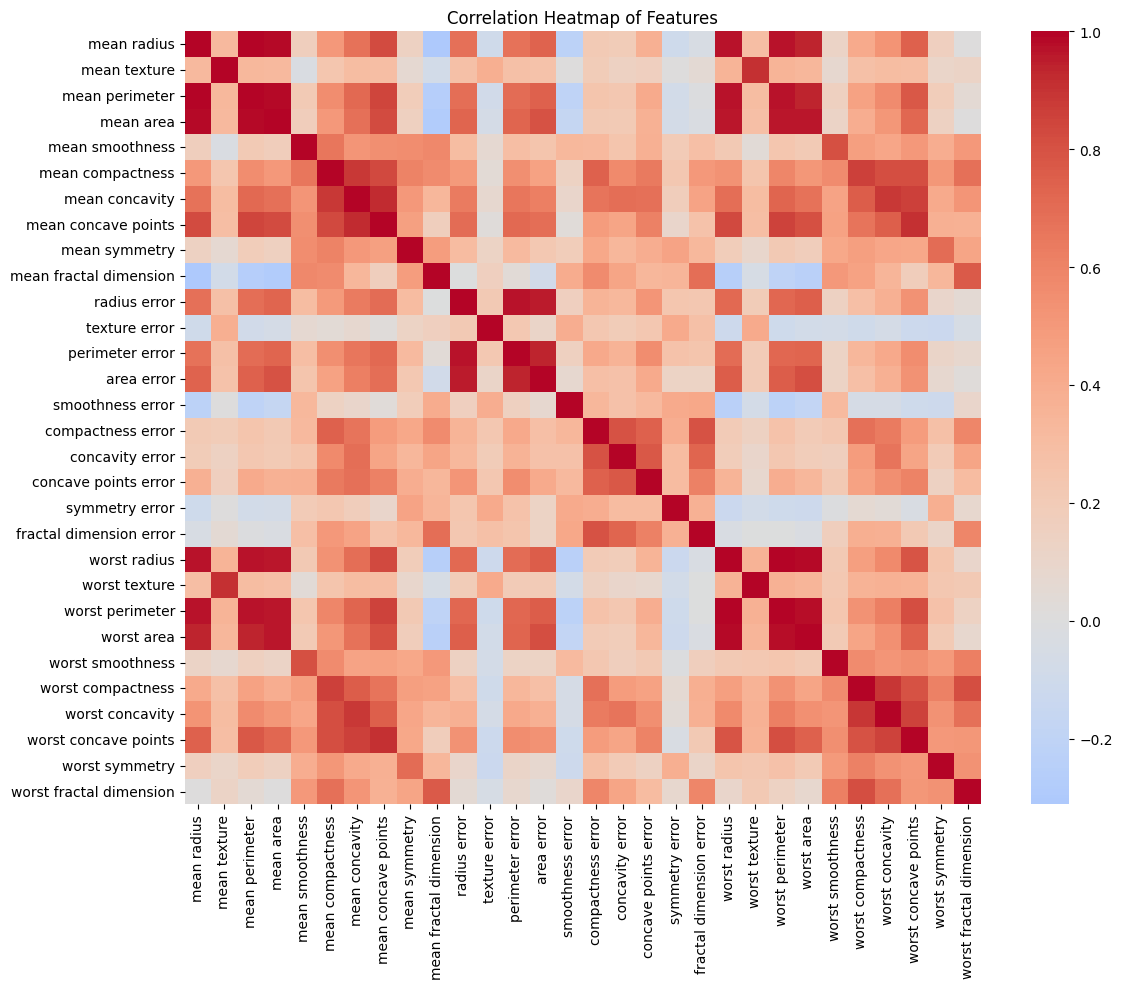

In [11]:
# Multivariate plots: Correlation heatmap
print("Correlation heatmap: Visualizing relationships between all feature pairs.")
print("Generated multivariate plots")
plt.figure(figsize=(12, 10))
correlations = df.drop('target', axis=1).corr()
sns.heatmap(correlations, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

Clear blocks of high correlation (red squares). Features measuring similar properties (mean, se, worst) are highly correlated within their groups.


Scatter plots: Showing relationship between two features, colored by class.


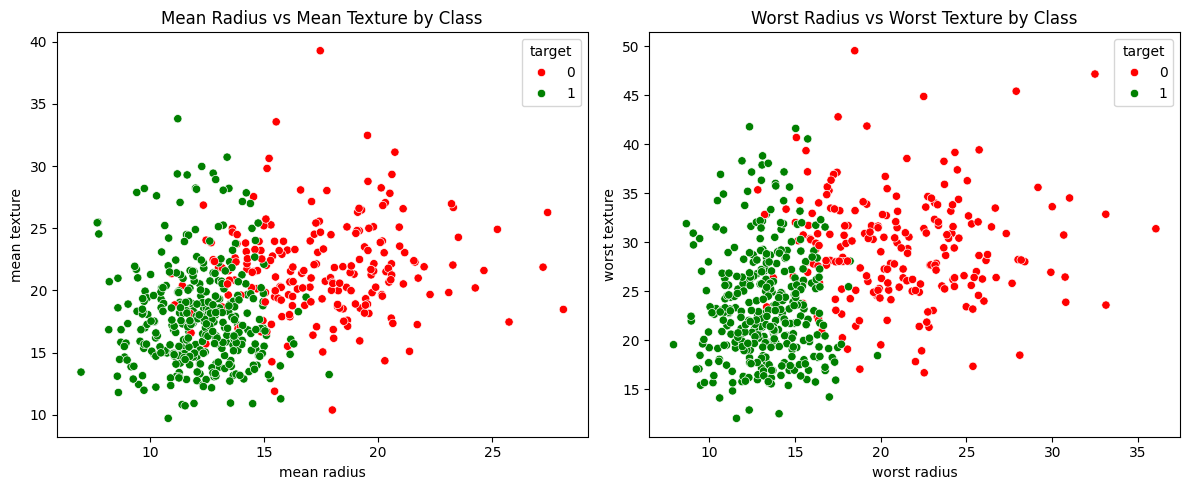

In [12]:
# Multivariate plots: Scatter plots for selected features
print("\nScatter plots: Showing relationship between two features, colored by class.")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: mean radius vs mean texture colored by class
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target',
                palette={0: 'red', 1: 'green'}, ax=axes[0])
axes[0].set_title('Mean Radius vs Mean Texture by Class')

# Scatter plot: worst radius vs worst texture colored by class
sns.scatterplot(data=df, x='worst radius', y='worst texture', hue='target',
                palette={0: 'red', 1: 'green'}, ax=axes[1])
axes[1].set_title('Worst Radius vs Worst Texture by Class')

plt.tight_layout()
plt.show()

Clear separation between malignant (red) and benign (green) tumors in feature space. Malignant tumors tend to have larger radius and texture values.


Pair plot: Multiple scatter plots showing relationships between feature pairs.


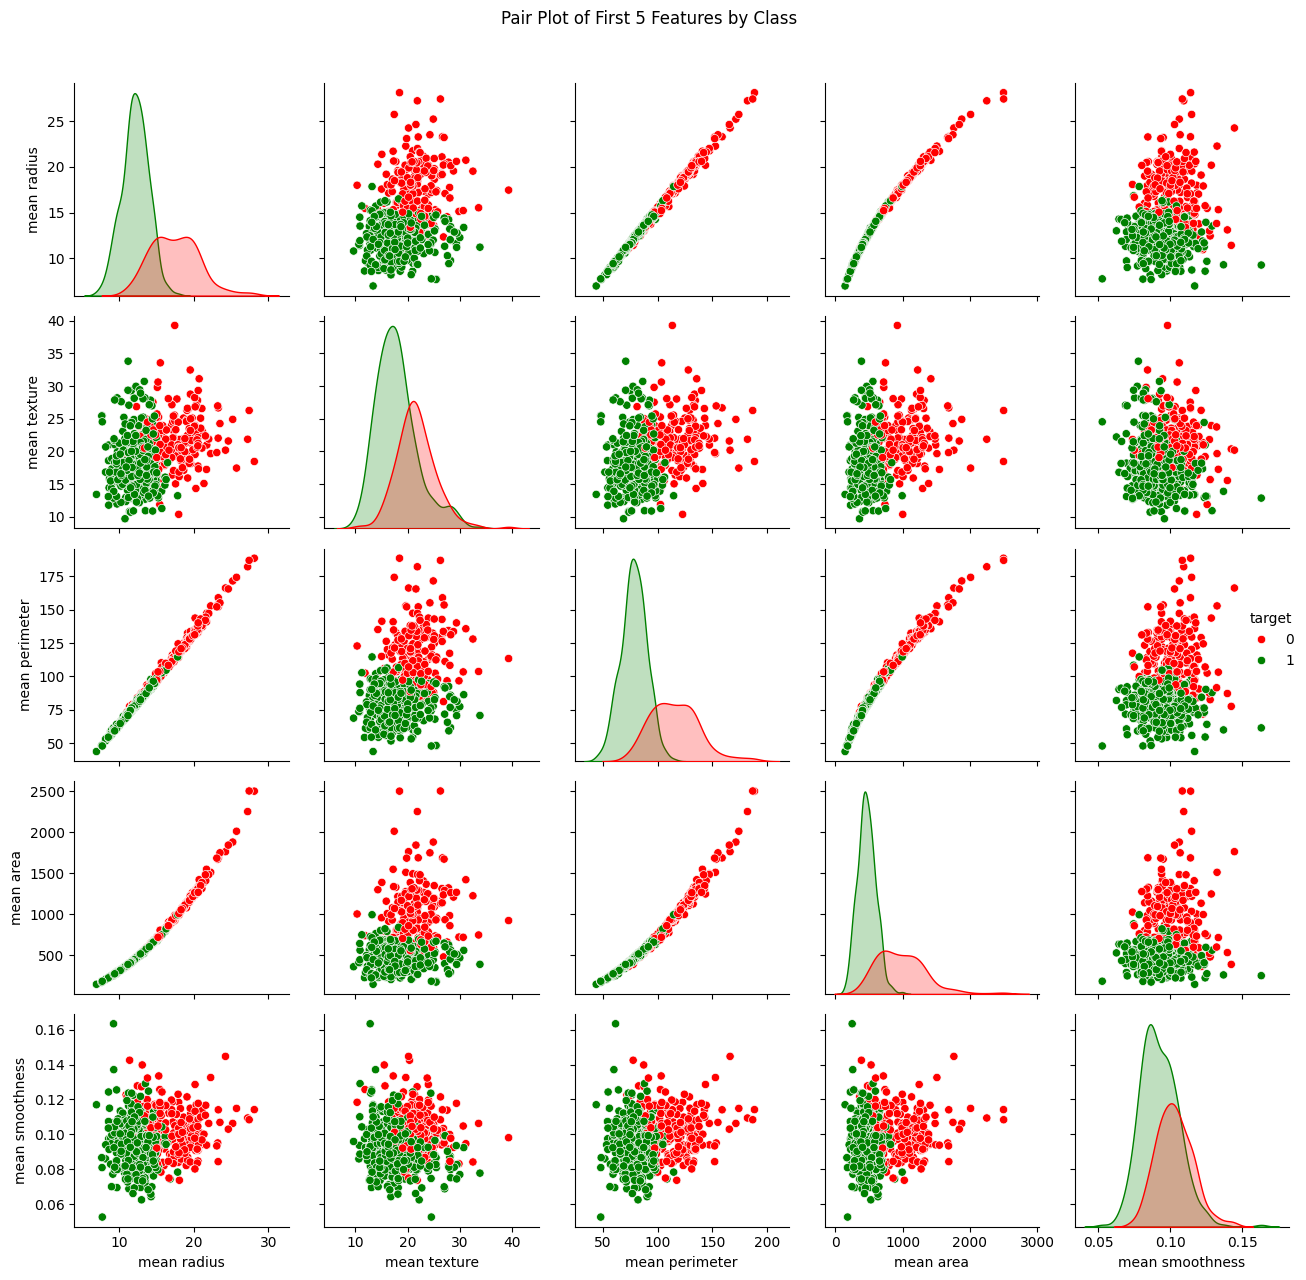

In [14]:
# Multivariate plots: Pair plot for first 5 features
import warnings
warnings.filterwarnings('ignore')
print("\nPair plot: Multiple scatter plots showing relationships between feature pairs.")

first_five_features = data.feature_names[:5]
plot_df = pd.concat([df[first_five_features], df['target']], axis=1)
sns.pairplot(plot_df, hue='target', palette={0: 'red', 1: 'green'})
plt.suptitle('Pair Plot of First 5 Features by Class', y=1.02)
plt.tight_layout()
plt.show()

Diagonal shows distribution per class. Off-diagonal shows how well features separate classes. Some feature pairs show better class separation than others.

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [15]:
# Prepare data for preprocessing
X = df.drop('target', axis=1).values  # Features
y = df['target'].values               # Target

print("Original data shape - X:", X.shape, "y:", y.shape)
print("First 5 rows of original data (first 3 features):")
print(X[:5, :3])
print()

Original data shape - X: (569, 30) y: (569,)
First 5 rows of original data (first 3 features):
[[ 17.99  10.38 122.8 ]
 [ 20.57  17.77 132.9 ]
 [ 19.69  21.25 130.  ]
 [ 11.42  20.38  77.58]
 [ 20.29  14.34 135.1 ]]



Rescale data to bring all features to same scale (between 0 and 1)

In [31]:
# Rescale data (between 0 and 1) - MinMaxScaler
print("Rescaling Data (MinMaxScaler 0 to 1)")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
from numpy import set_printoptions
set_printoptions(precision=3)
print("First 5 samples (first 3 features after rescaling):")
print(rescaledX[:5, :3])
print()

Rescaling Data (MinMaxScaler 0 to 1)
First 5 samples (first 3 features after rescaling):
[[0.521 0.023 0.546]
 [0.643 0.273 0.616]
 [0.601 0.39  0.596]
 [0.21  0.361 0.234]
 [0.63  0.157 0.631]]



Standardize data to center data around mean=0 with std=1.

In [30]:
# Standardize Data (mean=0, std=1) - StandardScaler
print("Standardizing Data (StandardScaler)")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedX = scaler.fit_transform(X)
print("First 5 samples (first 3 features after standardization):")
print(standardizedX[:5, :3])
print()

Standardizing Data (StandardScaler)
First 5 samples (first 3 features after standardization):
[[ 1.097 -2.073  1.27 ]
 [ 1.83  -0.354  1.686]
 [ 1.58   0.456  1.567]
 [-0.769  0.254 -0.593]
 [ 1.75  -1.152  1.777]]



Normalize data to scale each sample to unit norm (length=1). Useful for text classification or clustering where direction matters more than magnitude

In [29]:
# Normalize data (length of 1) - Normalizer
print("Normalizing Data (Normalizer)")
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normalizedX = scaler.fit_transform(X)
print("First 5 samples (first 3 features after normalization):")
print(normalizedX[:5, :3])
print()

Normalizing Data (Normalizer)
First 5 samples (first 3 features after normalization):
[[0.008 0.005 0.054]
 [0.009 0.007 0.056]
 [0.009 0.01  0.062]
 [0.016 0.029 0.111]
 [0.01  0.007 0.066]]



Binarize data to convert continuous features to binary values. Useful when you only care if feature is above/below threshold

In [28]:
# Binarization (convert to 0/1 based on threshold)
print("Binarizing Data")
from sklearn.preprocessing import Binarizer
# Use global mean of all features as threshold
global_mean = X.mean()
print(f"Using global mean threshold: {global_mean:.3f}")
binarizer = Binarizer(threshold=global_mean)
binaryX = binarizer.transform(X)
print("First 5 samples (first 3 features after binarization with global mean threshold):")
print(binaryX[:5, :3])
print()

Binarizing Data
Using global mean threshold: 61.891
First 5 samples (first 3 features after binarization with global mean threshold):
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]



## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.